In [1]:
%%bash
# pip3 install tensorflow # please uncomment for first time
# pip3 install keras

In [2]:
# Import the needed packages
import tensorflow as tf
import matplotlib.pyplot as plt

# For CNN layers and model
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D

%matplotlib inline

/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/alex/.local/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWa

In [3]:
# declare glabal variables
(x_train, y_train, x_test, y_test) = [0 ,0 ,0 , 0]
model = False

In [4]:
def load_data() :
    # Get mnist data set and split to train and test
    global x_train, y_train, x_test, y_test
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [5]:
load_data()

In [6]:
def pre_process_data() :
    # Reshape the datasets from 3 dim to 4 dim - required
    global x_train, y_train, x_test, y_test

    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [7]:
def normalize_data() :
    # Convert to float
    global x_train, y_train, x_test, y_test

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')

    # Normalize the RGB codes - Divide by 255
    x_train /= 255
    x_test /= 255
    x_train.shape

In [8]:
def create_model():
    # Create model
    input_shape = (28, 28, 1)
    global model
    model = Sequential()
    model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten()) 
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0.2))
    model.add(Dense(10,activation=tf.nn.softmax))

In [9]:
def train_model() :
    # Compile and train the model
    global x_train, y_train, x_test, y_test, model

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    model.fit(x=x_train, y=y_train, epochs=10)

In [10]:
def evaluate_model() :
    # Evaluate the model
    global x_train, y_train, x_test, y_test, model

    model.evaluate(x_test, y_test)

In [11]:

def predict_image(image_index) :
    # Predict image 
    global x_train, y_train, x_test, y_test, model

    
    # Validate index must be < 10 000
    if image_index > 10000 :
        image_index = 25
    image = x_test[image_index]
    img_rows, img_cols, i = image.shape

    plt.imshow(image.reshape(28, 28),cmap='Greys')
    pred = model.predict(image.reshape(1, img_rows, img_cols, 1))
    print('The predected image is : ' , pred.argmax())

    # printimage.reshape(28, 28))
    




Epoch 1/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.2038 - accuracy: 0.9390
Epoch 2/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0835 - accuracy: 0.9750
Epoch 3/10
60000/60000 [==============================] - 23s 377us/step - loss: 0.0590 - accuracy: 0.9819
Epoch 4/10
60000/60000 [==============================] - 23s 381us/step - loss: 0.0441 - accuracy: 0.9858
Epoch 5/10
60000/60000 [==============================] - 22s 368us/step - loss: 0.0336 - accuracy: 0.9884
Epoch 6/10
60000/60000 [==============================] - 22s 373us/step - loss: 0.0272 - accuracy: 0.9904
Epoch 7/10
60000/60000 [==============================] - 23s 385us/step - loss: 0.0260 - accuracy: 0.9909
Epoch 8/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.0216 - accuracy: 0.9927
Epoch 9/10
60000/60000 [==============================] - 23s 380us/step - loss: 0.0195 - accuracy: 0.9933
Epoch 10/10
10000/10000 [==========

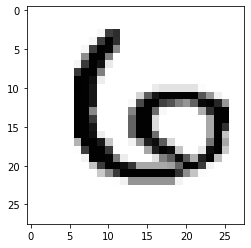

In [12]:
# RUN 

# 1 - Load Data
load_data()

# 2 - preprocess data
pre_process_data()

# 3 - normalize data
normalize_data()

# 4 - create model
create_model()

# 5 - train model with x_train, y_train
train_model()

# 6 - evaluate model
evaluate_model()




The predected image is :  5


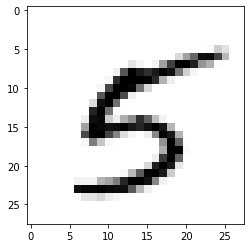

In [14]:
# 7 - predict an image by index ( < 10 000)
predict_image(52)